<a href="https://colab.research.google.com/github/edrfln/PemWeb/blob/main/AI_copy_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means dan Elbow method untuk klastering mall's costumer clasification



Library yang digunakan

In [ ]:
#Digunakan untuk pengolahan tuple pada data
import numpy as np

#Digunakan untuk memetakan data
import matplotlib.pyplot as plt

#Digunakan untuk memotong data yang tidak dibutuhkan
import pandas as pd

#Digunakan untuk menggenerate sembarang titik random
import random as rd

Algoritma K-means

In [ ]:
class Kmeans:

#Fungsi konstruksi penerima masukan
    def __init__(self,A,B):
        self.A=A
        self.Output={}
        self.Centroids=np.array([]).reshape(self.A.shape[1],0)
        self.B=B
        self.m=self.A.shape[0]
        
   #fungsi menentukan centroid secara random
    def kmeanspp(self,A,B):
        i=rd.randint(0,A.shape[0])
        Centroid_temp=np.array([A[i]])
        for k in range(1,B):
            centro=np.array([]) 
            for x in A:
                centro=np.append(centro,np.min(np.sum((x-Centroid_temp)**2)))
            probabilitas=centro/np.sum(centro)
            prob_kumulatif=np.cumsum(probabilitas)
            r=rd.random()
            i=0
            for j,p in enumerate(prob_kumulatif):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[A[i]],axis=0)
        return Centroid_temp.T
    
    #Funsi mencari centroid dan menghitung euclidean
    def fit(self,n_iter):
        #mencari centroid random
        self.Centroids=self.kmeanspp(self.A,self.B)
        
        #menghitung jarak euclidean dan menambahkan klaster
        for n in range(n_iter):
            Jarak_euclidean=np.array([]).reshape(self.m,0)
            for k in range(self.B):
                jarak=np.sum((self.A-self.Centroids[:,k])**2,axis=1)
                Jarak_euclidean=np.c_[Jarak_euclidean,jarak]
            C=np.argmin(Jarak_euclidean,axis=1)+1

            #menyesuaikan klaster
            Y={}
            #assign klaster pada Y
            for k in range(self.B):
                Y[k+1]=np.array([]).reshape(2,0)
            
            #penyesuaian klaster dengan jumlah data
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.A[i]]

            #penyesuaian dengan jumlah klaster
            for k in range(self.B):
                Y[k+1]=Y[k+1].T

            #penyesuaian centroid pada rata tata klaster
            for k in range(self.B):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
            
            self.Output=Y
            
    #hasil centroid
    def predict(self):
        return self.Output,self.Centroids.T
    
    #menghitung nilai wcss pada elbow method
    def WCSS(self):
        wcss=0
        for k in range(self.B):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

membaca data yang digunakan


In [ ]:
dataset=pd.read_csv('Mall_Customers.csv')


Komponen data sebelum filtrasi

In [ ]:
dataset.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

Filtrasi data

In [ ]:
A = dataset.iloc[:, [3, 4]].values


Data sesudah difiltrasi

In [ ]:
dataset.iloc[:, [3, 4]].head

<bound method NDFrame.head of      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]>

deskripsi data hasil filtrasi

In [ ]:
dataset.iloc[:, [3, 4]].describe()


,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Menentukan iterasi dan jumlah data

In [ ]:
m=A.shape[0]
n_iter=70


Penentuan jumlah klaster

In [ ]:
#penggunaan metode elbow
WCSS_array=np.array([])

#mencari titik elbow dari data berdasarkan iterasi
for B in range(1,11):
    kmeans=Kmeans(A,B)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0

    #penampungan titik elbow
    for k in range(B):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    #titik elbow diperoleh
    WCSS_array=np.append(WCSS_array,wcss)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Menampilkan titik elbow

In [ ]:
print(WCSS_array)

[270052. 184820. 106463.  73941.  44537.  38811.  34719.  26748.  28223.
  23078.]


pemetaan titik elbow pada grafik

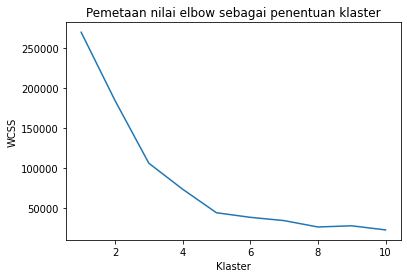

In [ ]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Klaster')
plt.ylabel('WCSS')
plt.title('Pemetaan nilai elbow sebagai penentuan klaster')
plt.show()

Penetapan jumlah klaster

In [ ]:
B=5

Melakukan training, penghitungan jarak euclidean titik pada klaster 

In [ ]:
kmeans=Kmeans(A,B)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

Pemetaan titik pada klaster

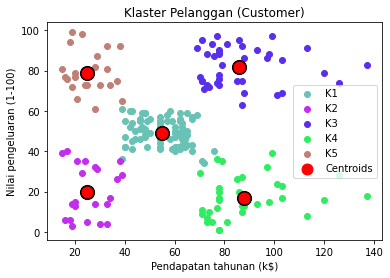

In [ ]:
#label dan warna centroid
color=['#69c2b6','#c12fed','#592fed','#2fed62','#bf8075']
labels=['K1','K2','K3','K4','K5']

#pemetaan titik data dan centroid
for k in range(B):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=200,c='black')
plt.scatter(Centroids[:,0],Centroids[:,1],s=120,c='#ff0000', label='Centroids')

#display
plt.title('Klaster Pelanggan (Customer)')
plt.xlabel('Pendapatan tahunan (k$)')
plt.ylabel('Nilai pengeluaran (1-100)')
plt.legend()
plt.show()

Melakukan pengujian

In [ ]:
#Data pengujian
Uji = np.array([[ 0,  5],
       [ 20,  12],
       [ 40,  20],
       [ 80,  14],
       [ 120,  19]])

b = Uji.shape


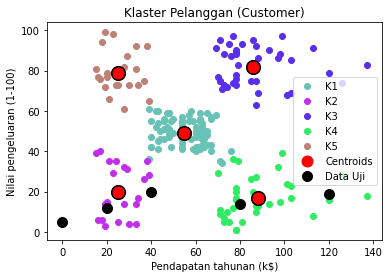

In [ ]:
#label dan warna centroid
color=['#69c2b6','#c12fed','#592fed','#2fed62','#bf8075']
labels=['K1','K2','K3','K4','K5']

#pemetaan data dan centroid
for k in range(B):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=200,c='black')
plt.scatter(Centroids[:,0],Centroids[:,1],s=120,c='#ff0000', label='Centroids')

#melihat letak dari data pengujian
plt.scatter(Uji[:,0],Uji[:,1],s=100,c='black',label='Data Uji')

#display
plt.title('Klaster Pelanggan (Customer)')
plt.xlabel('Pendapatan tahunan (k$)')
plt.ylabel('Nilai pengeluaran (1-100)')
plt.legend()
plt.show()

Training dengan 5 kelas menggunakan data baru yang telah ditambah dengan data uji

In [ ]:
#update data
A = np.vstack((A, [ 0,  5],
       [ 20,  12],
       [ 40,  20],
       [ 80,  14],
       [ 120,  19]))


Data yang telah diupdate

In [ ]:
A.shape

(205, 2)

Menghtung jarak data pada centroid

In [ ]:
kmeans=Kmeans(A,B)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()

Pemetaan data yang telah ditambah dengan data pengujian

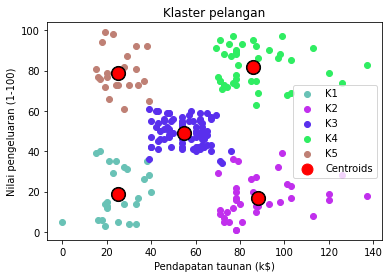

In [ ]:
#label dan warna centroid
color=['#69c2b6','#c12fed','#592fed','#2fed62','#bf8075']
labels=['K1','K2','K3','K4','K5']

#pemetaan titik data dan centroid
for k in range(B):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=200,c='black')
plt.scatter(Centroids[:,0],Centroids[:,1],s=120,c='#ff0000', label='Centroids')

#display
plt.title('Klaster pelangan')
plt.xlabel('Pendapatan taunan (k$)')
plt.ylabel('Nilai pengeluaran (1-100)')
plt.legend()
plt.show()

Data yang telah diupdate dengan data pengujian dapat membaur dengan
klasifikasi 5 centroid. pemetaan antara letak awal dan klasifikasi data mengujian adalah sama sehingga program berjalan dengan baik